# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [40]:
# Load data and split into feature and target variables
# Load data and split into feature and target variables
# sklearn.datasets.load_breast_cancer provides a convenient function for loading the data.
df = load_breast_cancer(as_frame=True).frame
print(df.columns)
# Target variable is already labeled as "target" and is the last variable in the dataset.

# Many ways to get features and target data.
x = df.drop("target", axis=1)
print(x.shape, type(x))
y = df["target"]
print(y.shape, type(y))

# Convenience methods provided by klearn.datasets.load_breast_cancer could also be used.
#x = load_breast_cancer(as_frame=True).data
#y = load_breast_cancer(as_frame=True).target

# Could also create dataframes for the feature and target variables as follows:
#x = df.iloc[:, :-1].values
#y = df.iloc[:, -1:].values


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
(569, 30) <class 'pandas.core.frame.DataFrame'>
(569,) <class 'pandas.core.series.Series'>


In [41]:
# View first 5 rows of the data
df.head()
# Head not showing all columns so run this to adjust.
pd.pandas.set_option('display.max_columns', None)
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

In [42]:
# How frequently does the positive target occur?
# Get number of times the positive target occurs
print(df["target"].value_counts())
# Calculate % of occurrence.
print(round(df["target"].value_counts().iloc[0] / 569, 4))

1    357
0    212
Name: target, dtype: int64
0.6274


In [43]:
# Generate summary statistics for the data
# Transpose to make it easier to read.
print(df.describe().T)
# If just for features use the code below, but used the whole dataset instead since we are asked about distribution of the target variable as well.

                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error          

Look at the distribution of the target variable: The target variable is binary (min=0, max=1, with at least 50% of the value being a 1 (skewed towards 1).

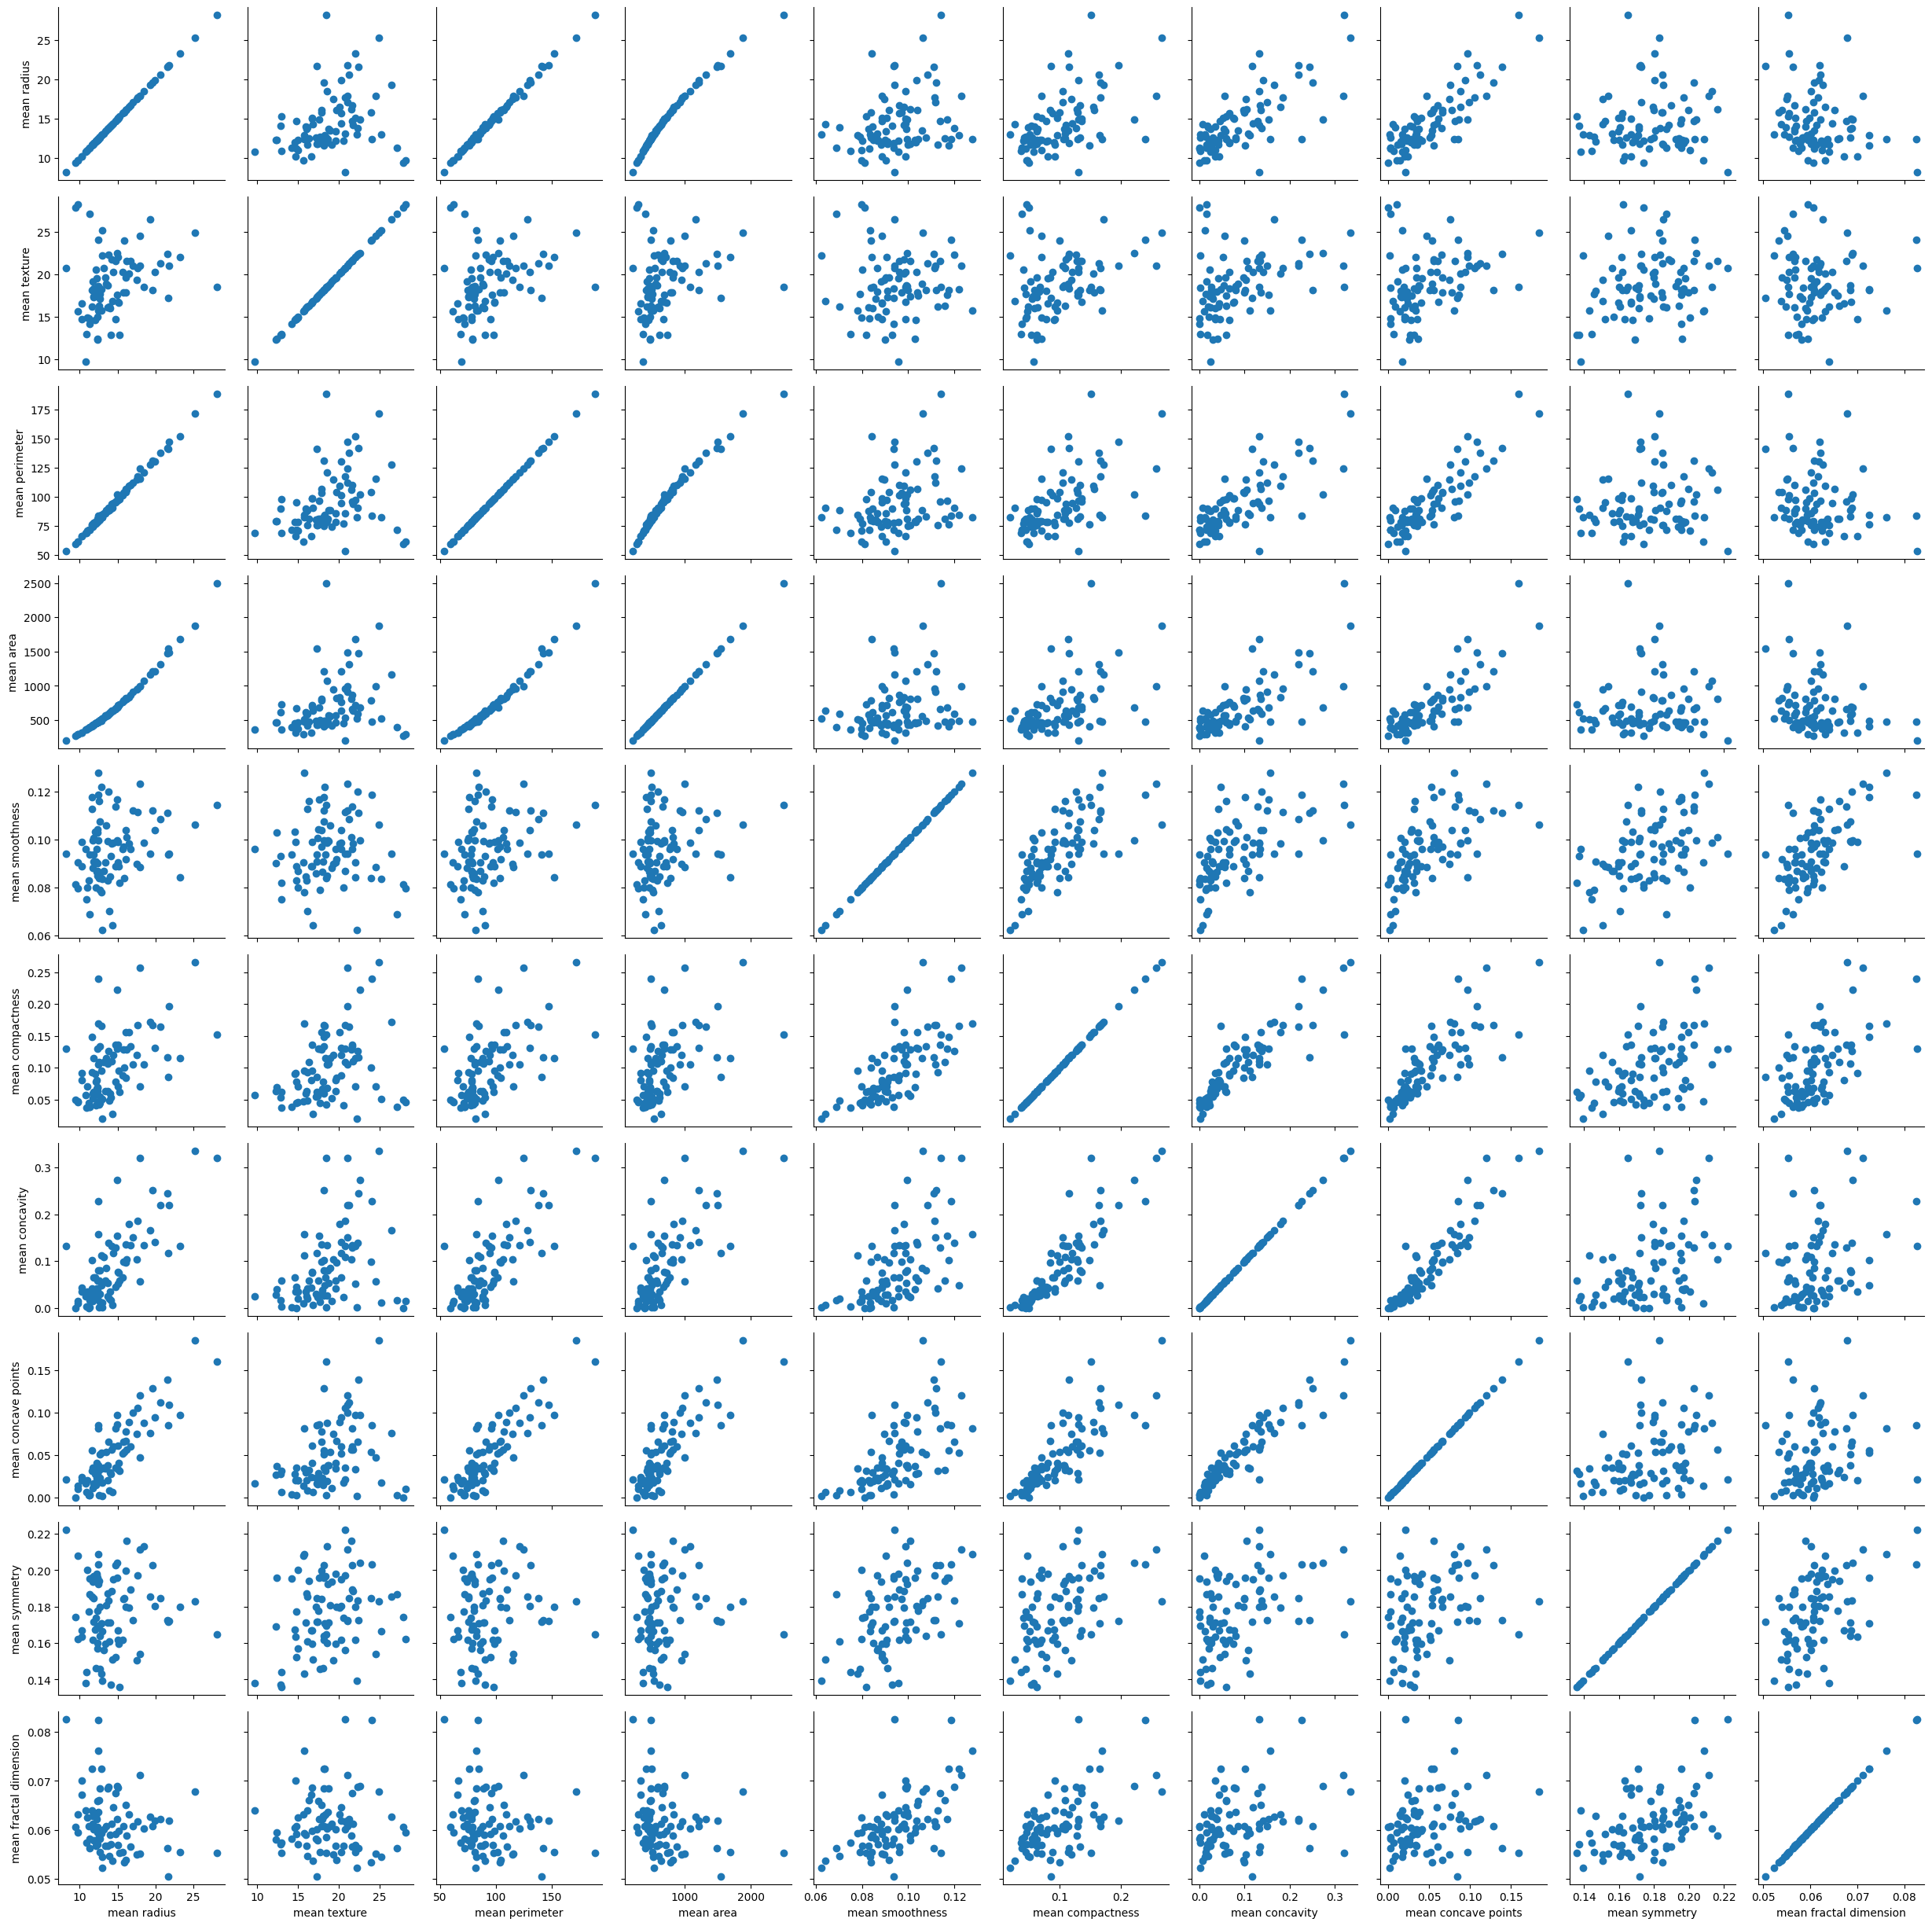

In [44]:
# Create a pairplot for the first few features
# Subset the features data. Chose first ten features to evalaute the mean variables.
x_subset_df = x[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension"]]
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
# Set sample_size. Set to 1.0 for all data. Tried different sizes to find acceptable time tradeoff.
sample_size = 0.15
# Set seed via sample random_state to provide for reproducibility of results (optional).
seed=123
sample_grid = sns.PairGrid(x_subset_df.sample(frac=sample_size, random_state=seed))
sample_grid.map(plt.scatter)

<Axes: >

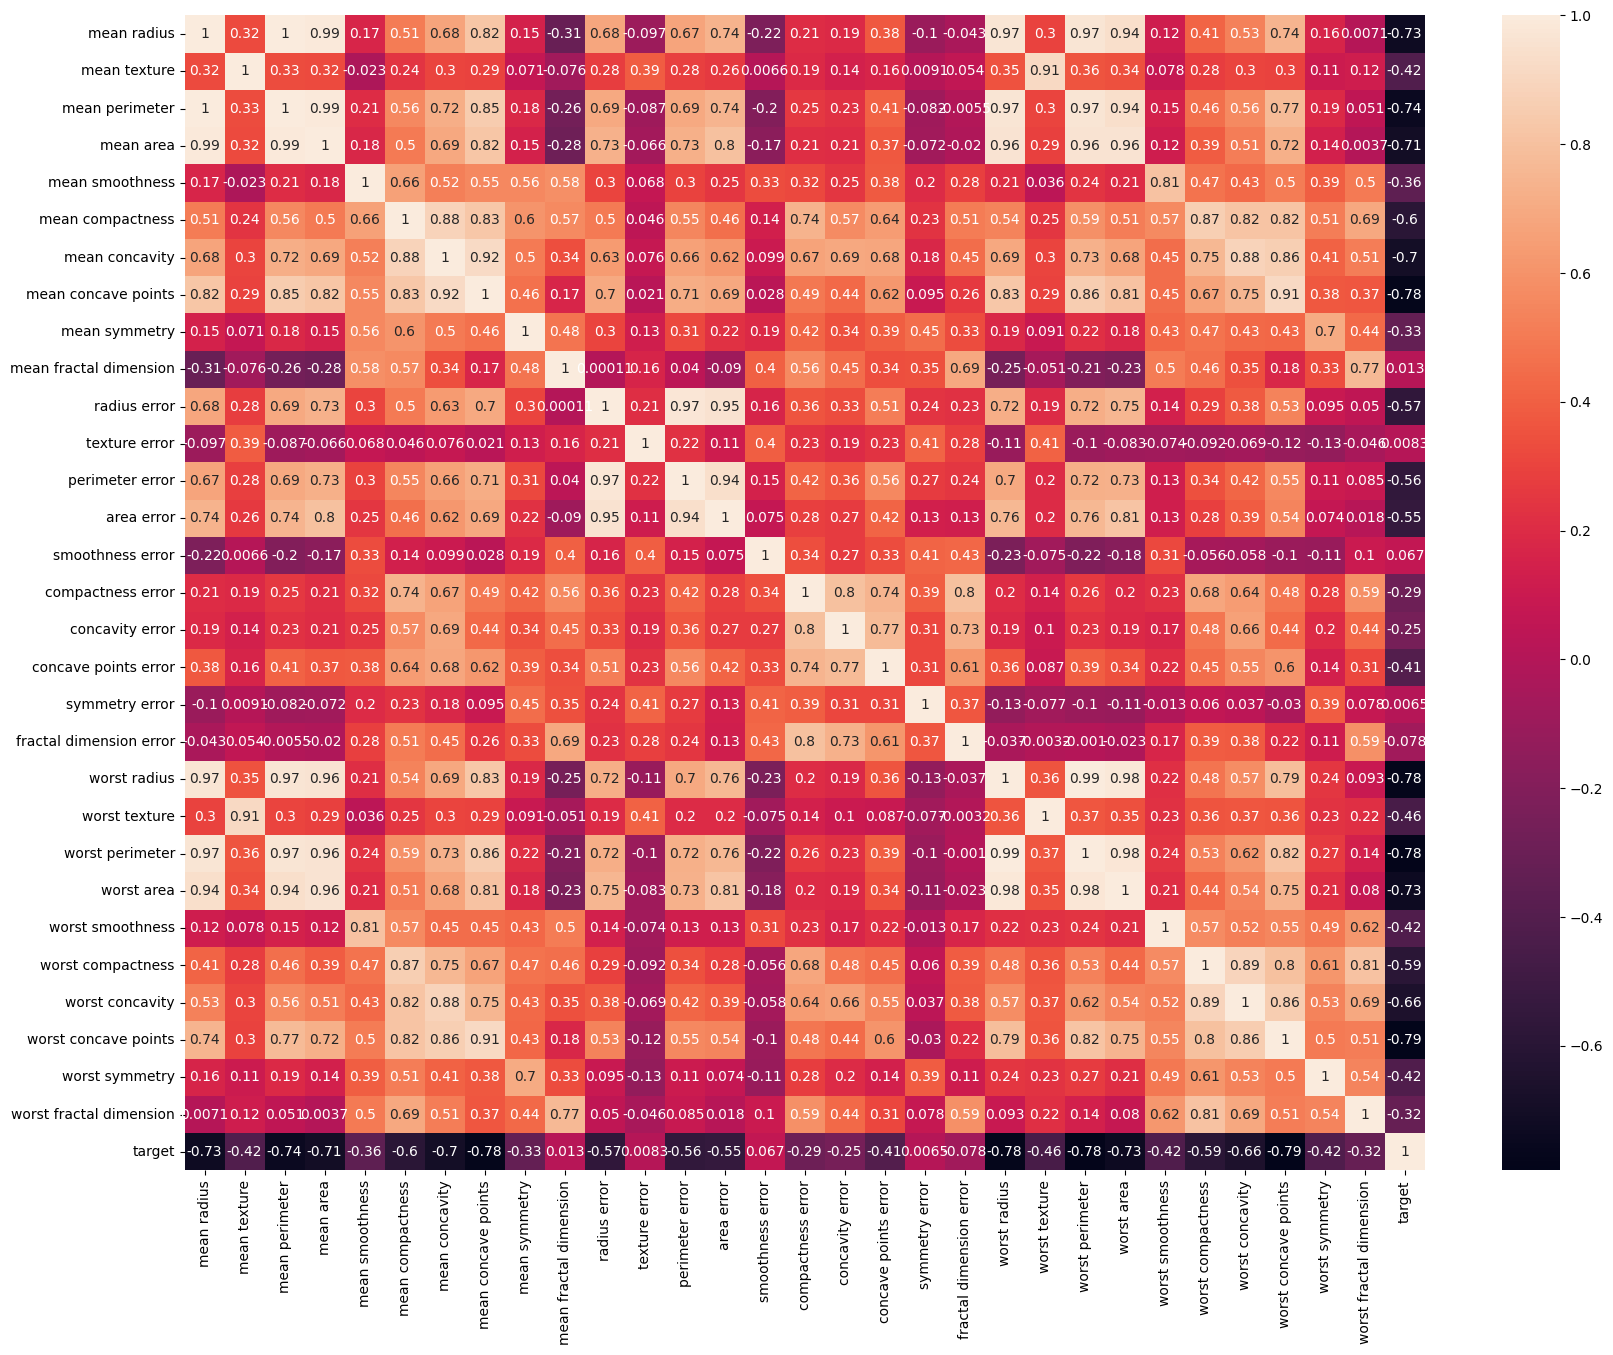

In [45]:
# Create a correlation coefficeint heatmap
correlation_matrix = df.corr()
# Create a heatmap of the correlation matrix
# Adjust size of heatmap so all columns will show.
plt.subplots(figsize=(20,15))
# Include the correlation numbers in the map.
sns.heatmap(correlation_matrix, annot=True)

Create a heatmap of correlation between features. Is the multicollinearity assumption broken?

Based on the heatmap, these variables may be correlated with each other:

mean area, mean perimeter, mean radius, area error, worst radius, worst perimeter, and worst area (each of these features provide physical dimensions of the sample)

mean concavity, mean concave points, mean compactness, worst concavity, worst concave points, worst compactness (shape related features)

radius error, perimeter error, area error
mean smoothness, worst smoothness
mean texture, worst texture
mean fractal dimension, worst fractal dimension
compactness error, concavity error
mean symmetry, worst symmetry

Also from above...
No Multicollinearity: There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

In [46]:
# Test features for multicollinearity with VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF requires a constant in the data.
# https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
# Since we are evaluating vif prior to regression modeling, need to add constant to the data.
constant_df = add_constant(x)
# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(constant_df.values, i) for i in range(constant_df.shape[1])], index=constant_df.columns)
print (vif_data)

const                      1868.188844
mean radius                3806.115296
mean texture                 11.884048
mean perimeter             3786.400419
mean area                   347.878657
mean smoothness               8.194282
mean compactness             50.505168
mean concavity               70.767720
mean concave points          60.041733
mean symmetry                 4.220656
mean fractal dimension       15.756977
radius error                 75.462027
texture error                 4.205423
perimeter error              70.359695
area error                   41.163091
smoothness error              4.027923
compactness error            15.366324
concavity error              15.694833
concave points error         11.520796
symmetry error                5.175426
fractal dimension error       9.717987
worst radius                799.105946
worst texture                18.569966
worst perimeter             405.023336
worst area                  337.221924
worst smoothness         

Based on correlation heatmap and VIF results, suggest dropping multiple variables. Start with the highly correlated features with the highest vif and re-run. Repeat as needed.

In [47]:
# Drop multicollinear features from the data.
post_vif_df = constant_df.drop(["mean radius"], axis=1)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      1817.251746
mean texture                 11.882933
mean perimeter              541.712931
mean area                   317.093211
mean smoothness               7.990641
mean compactness             38.106611
mean concavity               65.978202
mean concave points          60.025840
mean symmetry                 4.203501
mean fractal dimension       15.677673
radius error                 75.101495
texture error                 4.185513
perimeter error              67.720819
area error                   41.089343
smoothness error              4.017499
compactness error            15.341790
concavity error              15.234133
concave points error         11.399633
symmetry error                5.175369
fractal dimension error       9.699518
worst radius                616.350861
worst texture                18.539292
worst perimeter             375.408537
worst area                  304.471896
worst smoothness             10.727206
worst compactness        

In [48]:
# Drop worst_radius.
post_vif_df.drop(["worst radius"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)


const                      1808.094523
mean texture                 11.759131
mean perimeter              325.641312
mean area                   237.012095
mean smoothness               7.988003
mean compactness             36.681620
mean concavity               64.836935
mean concave points          60.019062
mean symmetry                 4.123603
mean fractal dimension       15.670406
radius error                 38.637579
texture error                 4.132025
perimeter error              59.062677
area error                   33.911923
smoothness error              4.010296
compactness error            15.304014
concavity error              15.002055
concave points error         11.218541
symmetry error                5.156085
fractal dimension error       9.542616
worst texture                18.191599
worst perimeter             308.052048
worst area                  168.343121
worst smoothness             10.679641
worst compactness            35.779767
worst concavity          

In [49]:
# Drop mean perimeter.
post_vif_df.drop(["mean perimeter"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      1411.340082
mean texture                 11.714252
mean area                    34.491349
mean smoothness               7.964156
mean compactness             31.979571
mean concavity               64.655174
mean concave points          59.967015
mean symmetry                 4.123603
mean fractal dimension       14.921612
radius error                 36.056151
texture error                 4.092556
perimeter error              42.980382
area error                   32.570748
smoothness error              3.914161
compactness error            15.283194
concavity error              14.769198
concave points error         10.464462
symmetry error                5.128175
fractal dimension error       9.542575
worst texture                18.112512
worst perimeter             123.257811
worst area                   72.764912
worst smoothness             10.648133
worst compactness            34.263137
worst concavity              31.681663
worst concave points     

In [50]:
# Drop worst perimeter.
post_vif_df.drop(["worst perimeter"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      682.886466
mean texture                11.679833
mean area                   28.534200
mean smoothness              7.909212
mean compactness            28.746302
mean concavity              64.654796
mean concave points         59.816820
mean symmetry                4.071436
mean fractal dimension      12.724264
radius error                36.045576
texture error                4.040107
perimeter error             31.225949
area error                  20.995394
smoothness error             3.894739
compactness error           15.199363
concavity error             14.766025
concave points error        10.344938
symmetry error               5.007681
fractal dimension error      9.302515
worst texture               18.004692
worst area                  23.311066
worst smoothness            10.619439
worst compactness           34.253186
worst concavity             31.669493
worst concave points        34.141124
worst symmetry               9.077526
worst fracta

In [51]:
# Drop mean concavity.
post_vif_df.drop(["mean concavity"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      682.408482
mean texture                11.679763
mean area                   28.512892
mean smoothness              7.543056
mean compactness            26.110203
mean concave points         28.499831
mean symmetry                4.064239
mean fractal dimension      12.668596
radius error                35.617518
texture error                4.034866
perimeter error             31.178650
area error                  19.985188
smoothness error             3.872144
compactness error           14.858964
concavity error             11.587995
concave points error        10.013827
symmetry error               5.005381
fractal dimension error      9.248401
worst texture               18.003124
worst area                  23.026283
worst smoothness            10.598388
worst compactness           33.972256
worst concavity             21.188494
worst concave points        32.115706
worst symmetry               9.068073
worst fractal dimension     18.090939
dtype: float

In [52]:
# Drop radius error.
post_vif_df.drop(["radius error"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      665.091241
mean texture                11.465264
mean area                   25.427695
mean smoothness              7.482881
mean compactness            26.043226
mean concave points         27.801240
mean symmetry                4.047744
mean fractal dimension      12.232750
texture error                4.011486
perimeter error             16.007813
area error                  16.951023
smoothness error             3.861783
compactness error           14.577396
concavity error             11.499061
concave points error         9.999462
symmetry error               5.003384
fractal dimension error      8.800984
worst texture               17.724662
worst area                  20.617761
worst smoothness            10.595373
worst compactness           33.960639
worst concavity             21.056095
worst concave points        32.088040
worst symmetry               9.065905
worst fractal dimension     18.084650
dtype: float64


In [53]:
# Drop worst compactness.
post_vif_df.drop(["worst compactness"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      663.337719
mean texture                11.448852
mean area                   25.389376
mean smoothness              7.479515
mean compactness            19.208231
mean concave points         25.697888
mean symmetry                3.982308
mean fractal dimension      10.961595
texture error                3.998307
perimeter error             15.960835
area error                  16.935889
smoothness error             3.859669
compactness error            9.974677
concavity error             10.850219
concave points error         9.805676
symmetry error               4.941233
fractal dimension error      7.983689
worst texture               17.701635
worst area                  20.613295
worst smoothness            10.586935
worst concavity             18.432076
worst concave points        30.596655
worst symmetry               8.754474
worst fractal dimension     13.187594
dtype: float64


In [54]:
# Drop worst concave points.
post_vif_df.drop(["worst concave points"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      662.084558
mean texture                11.278555
mean area                   25.387830
mean smoothness              7.162886
mean compactness            19.175385
mean concave points         19.091402
mean symmetry                3.918815
mean fractal dimension      10.902634
texture error                3.937299
perimeter error             15.808730
area error                  16.917891
smoothness error             3.637606
compactness error            9.956527
concavity error              9.775933
concave points error         5.347299
symmetry error               4.900803
fractal dimension error      7.965699
worst texture               17.427935
worst area                  20.406468
worst smoothness             9.741783
worst concavity             16.192763
worst symmetry               8.435382
worst fractal dimension     13.047801
dtype: float64


In [55]:
# Drop mean area.
post_vif_df.drop(["mean area"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      446.802643
mean texture                11.179202
mean smoothness              7.162712
mean compactness            18.843208
mean concave points         15.619381
mean symmetry                3.895936
mean fractal dimension       9.707446
texture error                3.937174
perimeter error             15.619268
area error                  16.655447
smoothness error             3.632008
compactness error            9.936443
concavity error              9.705569
concave points error         5.250584
symmetry error               4.872228
fractal dimension error      7.946733
worst texture               17.236427
worst area                  10.626847
worst smoothness             9.608528
worst concavity             16.109962
worst symmetry               8.409532
worst fractal dimension     13.023306
dtype: float64


In [56]:
post_vif_df.drop(["mean compactness"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      306.786004
mean texture                11.134313
mean smoothness              6.970849
mean concave points         11.753066
mean symmetry                3.829642
mean fractal dimension       7.907186
texture error                3.890957
perimeter error             15.333308
area error                  16.345495
smoothness error             3.552541
compactness error            6.363339
concavity error              9.367267
concave points error         5.245367
symmetry error               4.871870
fractal dimension error      7.584276
worst texture               17.232376
worst area                  10.602010
worst smoothness             9.606389
worst concavity             15.700019
worst symmetry               8.401090
worst fractal dimension     13.023120
dtype: float64


In [57]:
post_vif_df.drop(["worst texture"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      306.482175
mean texture                 1.715846
mean smoothness              6.795612
mean concave points         11.715292
mean symmetry                3.654734
mean fractal dimension       7.890069
texture error                2.033874
perimeter error             15.281161
area error                  16.333806
smoothness error             3.384881
compactness error            6.337432
concavity error              9.364521
concave points error         5.235966
symmetry error               4.312472
fractal dimension error      7.575192
worst area                  10.540176
worst smoothness             8.644833
worst concavity             15.699140
worst symmetry               7.294569
worst fractal dimension     13.021119
dtype: float64


In [58]:
post_vif_df.drop(["area error"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      306.081475
mean texture                 1.709993
mean smoothness              6.701262
mean concave points         11.653729
mean symmetry                3.651771
mean fractal dimension       7.750052
texture error                2.009042
perimeter error              4.317808
smoothness error             3.338723
compactness error            6.317986
concavity error              8.849322
concave points error         4.645375
symmetry error               4.312339
fractal dimension error      7.575158
worst area                   8.677078
worst smoothness             8.642994
worst concavity             15.510661
worst symmetry               7.265658
worst fractal dimension     12.938791
dtype: float64


In [59]:
# Drop worst concavity.
post_vif_df.drop(["worst concavity"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      305.014152
mean texture                 1.700532
mean smoothness              6.621582
mean concave points          8.984360
mean symmetry                3.651681
mean fractal dimension       7.168068
texture error                2.008790
perimeter error              4.310524
smoothness error             3.235873
compactness error            5.889510
concavity error              3.966669
concave points error         4.440585
symmetry error               4.312337
fractal dimension error      5.734092
worst area                   8.675765
worst smoothness             8.373798
worst symmetry               7.264684
worst fractal dimension      8.485684
dtype: float64


In [60]:
post_vif_df.drop(["mean concave points"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      232.308257
mean texture                 1.696063
mean smoothness              5.785490
mean symmetry                3.596806
mean fractal dimension       7.167990
texture error                2.008723
perimeter error              4.301484
smoothness error             3.224204
compactness error            5.749258
concavity error              3.965773
concave points error         3.996318
symmetry error               4.309600
fractal dimension error      5.610022
worst area                   4.901311
worst smoothness             8.344366
worst symmetry               7.257461
worst fractal dimension      8.390013
dtype: float64


In [61]:
# Drop worst fractal dimension.
post_vif_df.drop(["worst fractal dimension"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      212.190229
mean texture                 1.668377
mean smoothness              5.596005
mean symmetry                3.478491
mean fractal dimension       4.770667
texture error                2.008040
perimeter error              4.298252
smoothness error             3.019368
compactness error            5.146998
concavity error              3.898487
concave points error         3.949775
symmetry error               3.859916
fractal dimension error      5.051954
worst area                   4.895330
worst smoothness             7.507052
worst symmetry               6.347253
dtype: float64


In [62]:
# Drop worst smoothness.
post_vif_df.drop(["worst smoothness"], axis=1, inplace=True)

# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

const                      206.941218
mean texture                 1.645067
mean smoothness              2.797392
mean symmetry                3.032230
mean fractal dimension       4.599478
texture error                2.007920
perimeter error              4.290087
smoothness error             1.881640
compactness error            5.134582
concavity error              3.886040
concave points error         3.944298
symmetry error               2.664907
fractal dimension error      5.003769
worst area                   4.844801
worst symmetry               3.937739
dtype: float64


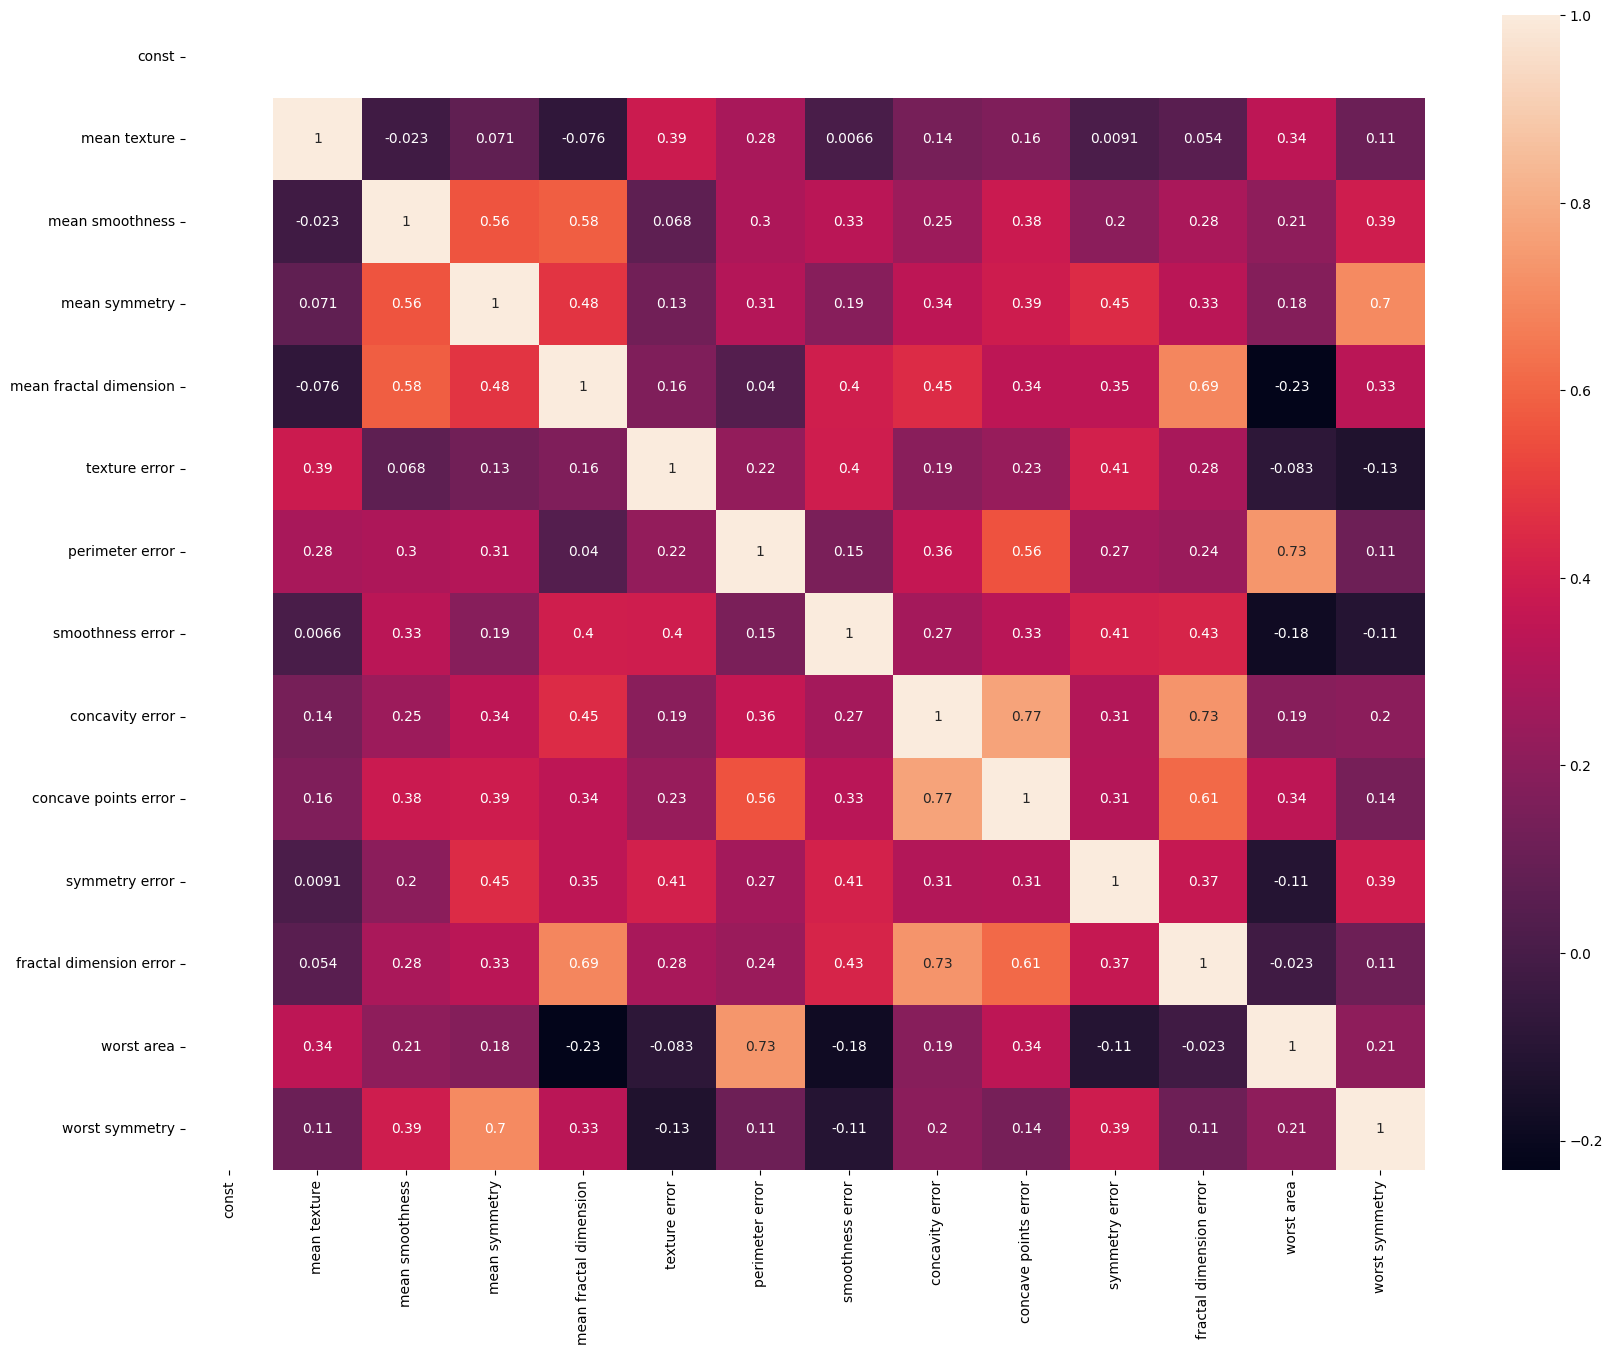

const                      198.339936
mean texture                 1.615666
mean smoothness              2.762636
mean symmetry                3.026111
mean fractal dimension       4.525553
texture error                2.001627
perimeter error              4.265756
smoothness error             1.878515
concavity error              3.609423
concave points error         3.659977
symmetry error               2.660047
fractal dimension error      4.199567
worst area                   4.838257
worst symmetry               3.845476
dtype: float64


In [63]:
# Drop compactness error
post_vif_df.drop(["compactness error"], axis=1, inplace=True)
# Create a correlation coefficeint matrix
correlation_matrix = post_vif_df.corr()
# Create a heatmap of the correlation matrix
# Adjust size of heatmap so all columns will show.
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
# Use vif to generate a series that includes the feature name and the vif result for each feature
vif_data = pd.Series( [variance_inflation_factor(post_vif_df.values, i) for i in range(post_vif_df.shape[1])], index=post_vif_df.columns)
print (vif_data)

All feature vif values are now below 5. For the purpose of this project can stop adjusting for multicollinearity now. When the modeling steps come, multiple models will be created: one not adjusted for multicollinearity, and one not.

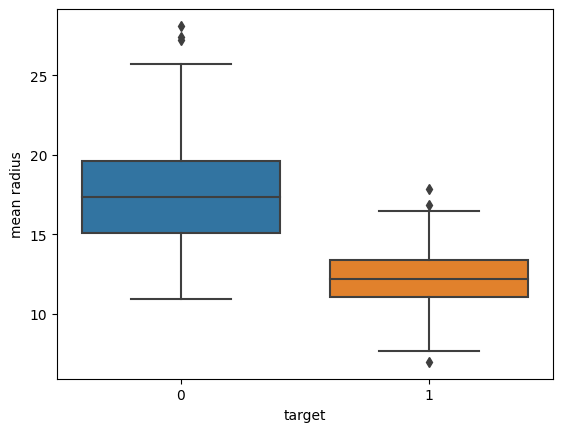

In [64]:
# Create a boxplot for mean radius by target type
# Create a boxplot for mean radius by target type
sns.boxplot(data=df, x="target", y="mean radius")
plt.show()

#Need to drop the constant for the post vif data
post_vif_df.drop("const", axis=1, inplace=True)


What stands out is that meand radius has extreme outliers. Also, there is some separation between the IQR for 0 and 1, which is helpful.

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


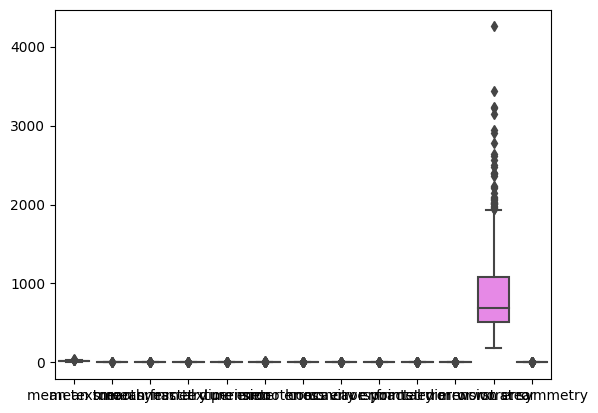

In [65]:
#Additional data exploration and prep.
# Check for null values.
print(df.isnull().sum())

# Check for outliers.
sns.boxplot(data=post_vif_df)
plt.show()

There are no null values, but worst area appears to have outliers.

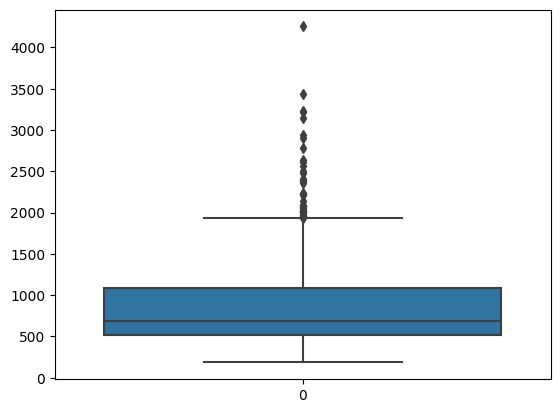

In [66]:
# worst area appears to have extreme outliers.
sns.boxplot(data=post_vif_df["worst area"])
plt.show()

Could drop the extreme outliers, but chose to leave them in for now.

Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a heatmap of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

Adjusted the data for multicollinearity. Also checked for null values (there were none). Detected one variable (worst area) with extreme outliers. Chose to leave the variable in for now.

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [67]:
# Split data into training and test sets
# Set seed for reproducability (optional).
seed = 123
# Can also test size to determine amount of data to use in the test split. Default is 0.25 (left it at default).
x_train, x_test, y_train, y_test = train_test_split(x, y.values, random_state=seed)
# Also split for the post vif data.
vif_x_train, vif_x_test, vif_y_train, vif_y_test = train_test_split(post_vif_df, y.values, random_state=seed)

In [68]:
# Build and train logistic regression model
# Save the feature names for later use.
feature_names = x_train.columns
# Scale the features?
# Was going to scale the variables but saw the project ask to normalize the data after running the regression.
# Did not see the point in standardizing and normalizing the data.
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit the training set
#scaler.fit(x_train)
# Transform the training and test sets. Note this takes a dataframe as an argument and returns a numpy array.
#x_train = scaler.transform(x_train)
#print(type(x_train))
#x_test = scaler.transform(x_test)

# Create logistic regression model
lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(x_train, y_train)

# Also for the post vif data.
#vif_scaler = StandardScaler()
# Fit the training set
#vif_scaler.fit(vif_x_train)
# Transform the training and test sets. Note this takes a dataframe as an argument and returns a numpy array.
#vif_x_train = vif_scaler.transform(vif_x_train)
#vif_x_test = vif_scaler.transform(vif_x_test)

vif_lr_model = LogisticRegression(solver="liblinear")
vif_lr_model.fit(vif_x_train, vif_y_train)

LogisticRegression(solver='liblinear')

Was going to perform scaling of variables prior to regression but saw the project request to normalize the data after regression. Did not see a reason for both scaliong and normalizing the data so commented the sclaing code out.

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [69]:
# Evaluate the model
lr_predictions = lr_model.predict(x_test)
print(lr_predictions)

# Score the model to help with evaluation.
score = lr_model.score(x_test, y_test)
print("Score:", score)

# Can also get the probability
#print(lr_model.predict_proba(x_test))

# Now for the vif model and data
vif_lr_predictions = vif_lr_model.predict(vif_x_test)
print(vif_lr_predictions)

# Score the model to help with evaluation.
vif_score = vif_lr_model.score(vif_x_test, vif_y_test)
print("Score:", vif_score)


[1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0]
Score: 0.986013986013986
[1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0]
Score: 0.9370629370629371


In [70]:
# Generate a confusion matrix
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
print(lr_confusion_matrix)

# Plot the confusion matrix like in the LinkedIn lesson?

# Now for vif data
vif_lr_confusion_matrix = confusion_matrix(vif_y_test, vif_lr_predictions)
print(vif_lr_confusion_matrix)

[[52  2]
 [ 0 89]]
[[47  7]
 [ 2 87]]


2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
0 false positives , and 2 false negatives for the model with all features (not adjusted for multicollinearity). The post vif model predicted 2 false positives, and 7 false negatives.

In [71]:
# Generate a classification report
lr_classification_report = classification_report(y_test, lr_predictions)
print(lr_classification_report)
print(x.shape)
# Vif data
vif_lr_classification_report = classification_report(vif_y_test, vif_lr_predictions)
print(vif_lr_classification_report)
print(post_vif_df.shape)
# Can also visualize the classification report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

(569, 30)
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.93      0.98      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

(569, 13)


3. Use classification_report to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.
The 0 and 1 represent the classes we are trying to predict with this model - the binary target values (benign and malignant). Comparing the two models, the full feaure model has a higher precision value (higher proportion of correct positive predictions)for both 0 and 1. Similarly, the full feature model has higher recall rates for 0 and 1, meaning it is better at identifying all positives. f1 score combines precision and recall, so no surpise it is higher for the full feaure model as well (the vif adjusted model was higher on both false positives and false negatives). The support column keeps track of the number of occurrences. The 0.99 accuracy of the full feaure model may seem appealing but due to the loss of interpretability of the effect of individual features due to multicollinearity the vif adjusted model is likely better for this project.<br>
Note that feature data reduced based on vif numbers has only 13 columns, which means it would scale in production better than the full feature data which has 30 columns. While the logistic regression score is higher for the full feature data, the tradeoff of using a smaller number of features in production is likely worth it (along with the interpretability for having adjusted for multicollinearity.<br>

Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [72]:
# Extract coefficients
lr_coef = lr_model.coef_
#print(type(lr_coef))
print(lr_coef)

# For vif data
# Extract coefficients
vif_lr_coef = vif_lr_model.coef_
print(vif_lr_coef)

[[ 2.05023225e+00  1.20128362e-01 -6.90688235e-02 -3.16352179e-03
  -1.49183983e-01 -4.09152335e-01 -6.31371821e-01 -3.25172478e-01
  -2.14537683e-01 -2.49154729e-02  1.80291851e-02  1.31676405e+00
   1.26410152e-01 -9.39685709e-02 -1.78484758e-02 -1.18952421e-03
  -5.33980770e-02 -3.72219489e-02 -3.88839224e-02  4.97794330e-03
   1.18213021e+00 -3.38378560e-01 -1.20070137e-01 -2.23261693e-02
  -2.78690879e-01 -1.09589366e+00 -1.54046651e+00 -6.30277091e-01
  -6.47145553e-01 -1.06438311e-01]]
[[-0.0444214   0.14235064  0.36829871  0.20658225  0.79773632 -0.37628314
   0.00652713 -0.20298967 -0.03617794  0.03924875 -0.00208354 -0.00559099
  -0.44481667]]


In [73]:
# Normalize the coefficients by the standard deviation
# Get the mean for each feature variable.
features_mean = x.mean().values
# Get the standard deviation for each feature variable.
features_std = x.std().values
#print(features_mean)
#print(features_std)
# Normalize calculation
lr_normalized_coef = (lr_coef - features_mean) / features_std
print(lr_normalized_coef)

# For vif data
# Get the mean for each feature variable.
vif_features_mean = post_vif_df.mean().values
# Get the standard deviation for each feature variable.
vif_features_std = post_vif_df.std().values
#print(features_mean)
#print(features_std)
# Normalize calculation
vif_lr_normalized_coef = (vif_lr_coef - vif_features_mean) / vif_features_std
print(vif_lr_normalized_coef)

[[ -3.42704091  -4.45695437  -3.78773505  -1.86094337 -17.45890406
   -9.72290294  -9.03377903  -9.64082981 -14.43406598 -12.42331099
   -1.39605155   0.18111287  -1.35501788  -0.88877015  -8.28952737
   -1.48913313  -2.82553577  -7.94421726  -7.18891244   0.44709286
   -3.12151986  -4.23275485  -3.19562972  -1.54666662 -18.00331737
   -8.58134505  -8.68860989 -11.3320673  -15.14885225 -10.54101712]]
[[ -4.49521254   3.27004674   6.82625398  20.36504987  -0.75975406
   -1.60364768  -0.17113835  -7.78118716  -7.77501744   2.26295808
   -2.22157317  -1.54663723 -11.87849243]]


In [74]:
# Sort feature names and coefficients by absolute value of coefficients

# Get the absolute value of the normalized coefficients.
lr_abs_normalized_coef = np.absolute(lr_normalized_coef)
# Zip the feature names and absolute value of the coefficients together.
#zipped = zip(lr_model.feature_names_in_ , lr_abs_normalized_coef[0])
zipped = zip(feature_names, lr_abs_normalized_coef[0])
zipped_list = list(zipped)
sorted_features_coef = sorted(zipped_list, key=lambda x: x[1])
print(sorted_features_coef)

# Vif data
# Get the absolute value of the normalzied coefficients.
vif_lr_abs_normalized_coef = np.absolute(vif_lr_normalized_coef)
# Zip the feature names and absolute value of the coefficients together.
vif_zipped = zip(post_vif_df.columns, vif_lr_abs_normalized_coef[0])
#vif_zipped = zip(vif_lr_model.feature_names_in_, vif_lr_abs_normalized_coef[0])
vif_zipped_list = list(vif_zipped)
vif_sorted_features_coef = sorted(vif_zipped_list, key=lambda x: x[1])
print(vif_sorted_features_coef)

[('texture error', 0.18111287017996014), ('fractal dimension error', 0.4470928580244725), ('area error', 0.8887701469397258), ('perimeter error', 1.3550178814276452), ('radius error', 1.396051551589404), ('compactness error', 1.489133125696957), ('worst area', 1.5466666183109303), ('mean area', 1.86094337483798), ('concavity error', 2.825535773320295), ('worst radius', 3.1215198632219483), ('worst perimeter', 3.195629721429945), ('mean radius', 3.427040908951338), ('mean perimeter', 3.7877350522899986), ('worst texture', 4.232754849177418), ('mean texture', 4.4569543657730755), ('symmetry error', 7.188912442462782), ('concave points error', 7.944217262675229), ('smoothness error', 8.289527366919748), ('worst compactness', 8.581345048019504), ('worst concavity', 8.68860989285405), ('mean concavity', 9.033779032426933), ('mean concave points', 9.640829810642757), ('mean compactness', 9.72290293953786), ('worst fractal dimension', 10.541017124499888), ('worst concave points', 11.332067302

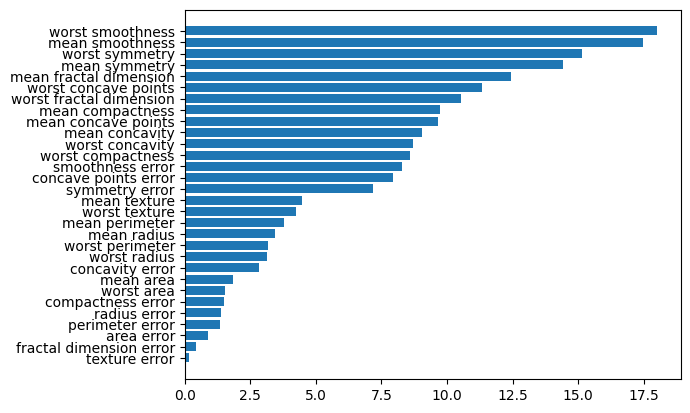

In [75]:
# Visualize feature importances
# Plot the full features model, which has not been adjusted for multicollinearity.
sorted_feature_names = list(zip(*sorted_features_coef))[0]
sorted_coef = list(zip(*sorted_features_coef))[1]
plt.barh(sorted_feature_names, width=sorted_coef)
plt.show()

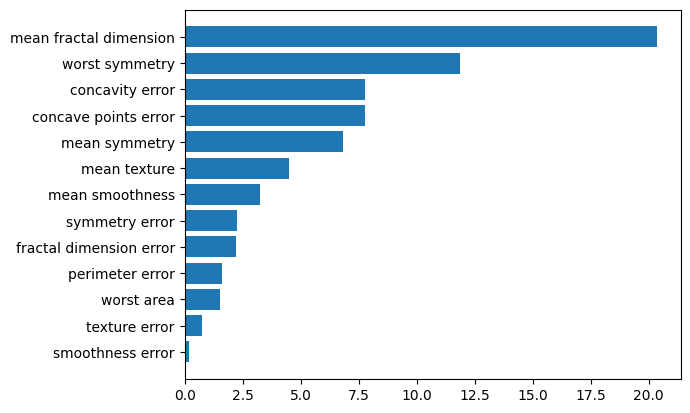

In [76]:
#Visualize feature importances

# Plot the vif adjsuted model.
vif_sorted_feature_names = list(zip(*vif_sorted_features_coef))[0]
vif_sorted_coef = list(zip(*vif_sorted_features_coef))[1]
plt.barh(vif_sorted_feature_names, width=vif_sorted_coef)
plt.show()

4. ...Based on magnitude, what appears to be the most important predictor of cancer in this dataset?
For the vif adjusted model, mean fractal dimension appears to be the most important predictor of cancer in this dataset. This seems consistent with relevant medical literature (ex. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6349609/ ).
Note that across the two models, 3 of the top 5 contributing variables are the same (mean fractal dimension, worst symmetry, and mean symmetry). These are all related to shape. The fact that they appear in a different order in the model with all features shows how difficult it is to interpret the variables impact when multicollinearity is present.
